[Cats-Dogs data link](https://github.com/vyomshm/Cats-Dogs-with-keras/tree/master/data)

# CNN in Keras

In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

C:\Users\ebocarru\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'all/train2'
valid_path = 'all/validation2'
test_path = 'all/test2'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), 
                                                         classes=['Dogs','Cats'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), 
                                                         classes=['Dogs','Cats'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), 
                                                         classes=['Dogs','Cats'], batch_size=10)

Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

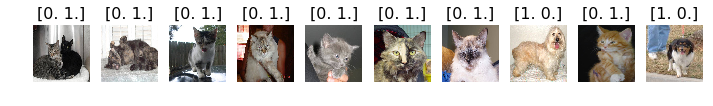

In [6]:
plots(imgs, titles=labels)

In [7]:
test_batches.class_indices

{'Dogs': 0, 'Cats': 1}

[Create and train a CNN Image Classifier with Keras](https://www.youtube.com/watch?v=daovGOlMbT4&index=11&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL)

# Build and train CNN

In [7]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)), Flatten(), Dense(2, activation='softmax'),
])

In [8]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit_generator(train_batches, steps_per_epoch=10, validation_data=valid_batches, validation_steps=2,
                    epochs=5, verbose=2)

Epoch 1/5
 - 6s - loss: 8.0613 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 6s - loss: 8.3814 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 6s - loss: 7.4143 - acc: 0.5400 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 5s - loss: 8.7038 - acc: 0.4600 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 6s - loss: 8.3814 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000


[Make predictions with a Keras CNN Image Classifier](https://www.youtube.com/watch?v=bfQBPNDy5EM&index=12&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL)

# Predict

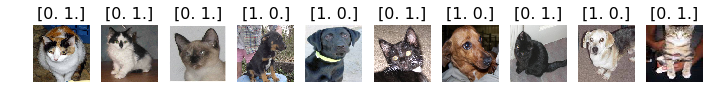

In [10]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [11]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0.], dtype=float32)

In [12]:
predictions = model.predict_generator(test_batches, steps=2, verbose=0)

In [13]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [14]:
cm = confusion_matrix(test_batches.classes, predictions[:,0])

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0 10]
 [ 0 10]]


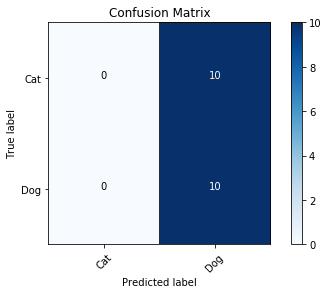

In [16]:
cm_plot_labels = ['Cat','Dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

[Fine-tune VGG16 Image Classifier with Keras | Part 1: Build](https://www.youtube.com/watch?v=oDHpqu52soI&index=14&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&t=0s)

# Build Fine-tuned VGG16 model

In [17]:
vgg16_model = keras.applications.vgg16.VGG16()

In [18]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
type(vgg16_model)

keras.engine.training.Model

In [20]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
model.layers.pop()

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
#For not update layers
for layer in model.layers:
    layer.trainable = False

In [25]:
model.add(Dense(2,activation = 'softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

[Fine-tune VGG16 Image Classifier with Keras | Part 2: Train](https://www.youtube.com/watch?v=INaX55V1zpY&index=14&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL)

# Train the fine-tuned VGG16 model

In [27]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit_generator(train_batches, steps_per_epoch=10, validation_data=valid_batches, validation_steps=2,
                    epochs=5, verbose=2)

Epoch 1/5
 - 89s - loss: 0.6910 - acc: 0.5400 - val_loss: 0.6861 - val_acc: 0.6500
Epoch 2/5
 - 80s - loss: 0.6771 - acc: 0.8600 - val_loss: 0.6696 - val_acc: 0.9000
Epoch 3/5
 - 81s - loss: 0.6618 - acc: 0.9200 - val_loss: 0.6590 - val_acc: 0.9500
Epoch 4/5
 - 76s - loss: 0.6533 - acc: 0.9600 - val_loss: 0.6509 - val_acc: 0.9500
Epoch 5/5
 - 64s - loss: 0.6473 - acc: 0.9700 - val_loss: 0.6463 - val_acc: 0.9500


[Fine-tune VGG16 Image Classifier with Keras | Part 3: Predict](https://www.youtube.com/watch?v=HDom7mAxCdc&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=15)

# Predict using fine-tuned VGG16 model

In [47]:
predictions = model.predict_generator(test_batches, steps=2, verbose=0)

In [48]:
predictions

array([[0.52928215, 0.47071788],
       [0.4711044 , 0.52889556],
       [0.47063234, 0.5293677 ],
       [0.4711081 , 0.52889186],
       [0.49656534, 0.5034346 ],
       [0.52399033, 0.4760097 ],
       [0.4709965 , 0.5290035 ],
       [0.4711129 , 0.52888715],
       [0.5241101 , 0.47588998],
       [0.5271139 , 0.47288615],
       [0.47392383, 0.52607614],
       [0.5250032 , 0.47499675],
       [0.52485615, 0.47514385],
       [0.5219866 , 0.47801337],
       [0.47108582, 0.52891415],
       [0.5264308 , 0.47356924],
       [0.4710903 , 0.52890974],
       [0.525622  , 0.474378  ],
       [0.47105488, 0.52894515],
       [0.52503294, 0.47496706]], dtype=float32)

In [49]:
cm = confusion_matrix(test_batches.classes, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[6 4]
 [4 6]]


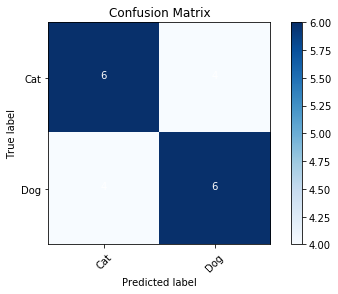

In [50]:
cm_plot_labels = ['Cat','Dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [51]:
np.round(predictions[:,0])

array([1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1.], dtype=float32)

In [46]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])